<a href="https://colab.research.google.com/github/JUSTSUJAY/pytorch_a2z/blob/main/04_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4. Logistic Regression with PyTorch
## 1. About Logistic Regression


### 1.1 Logistic Regression Basics

#### Classification algorithm
- Example: Spam vs No Spam
    - Input: Bunch of words
    - Output: Probability spam or not

#### Basic Comparison
- **Linear regression**
    - Output: numeric value given inputs
- **Logistic regression**:
    - Output: probability [0, 1] given input belonging to a class
    
    
#### Input/Output Comparison
- **Linear regression: Multiplication**
    - Input: [1]
        - Output: 2
    - Input: [2]
        - Output: 4
    - Trying to model the relationship `y = 2x`
- **Logistic regression: Spam**
    - Input: "Sign up to get 1 million dollars by tonight"
        - Output: p = 0.8
    - Input: "This is a receipt for your recent purchase with Amazon"
        - Output: p = 0.3
    - **p: probability it is spam**
        
            

### 1.2 Problems of Linear Regression
- Example
    - Fever
    - **Input**: temperature
    - **Output**: fever or no fever
- Remember
    - **Linear regression**: minimize error between points and line

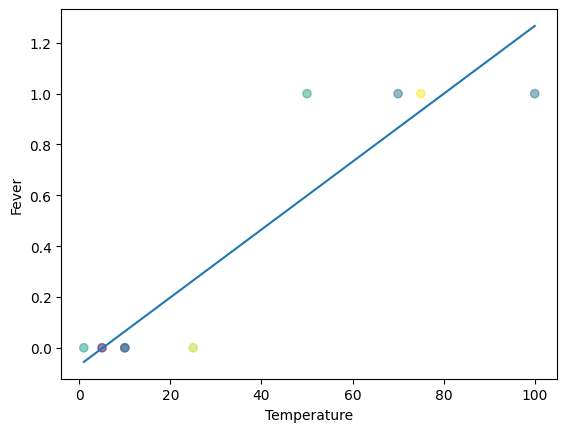

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = [1, 5, 10, 10, 25, 50, 70, 75, 100]
y = [0, 0, 0, 0, 0, 1, 1, 1, 1]

colors = np.random.rand(len(x))
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.ylabel("Fever")
plt.xlabel("Temperature")

plt.scatter(x, y, c=colors, alpha=0.5)
plt.show()

**Linear Regression Problem 1**
<br> Fever value can go negative (below 0) and positive (above 1).


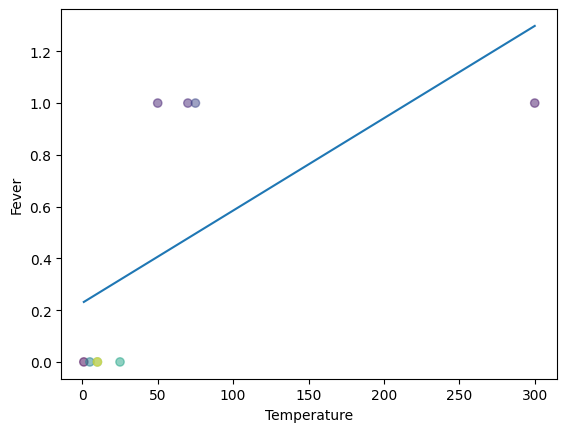

In [3]:
import numpy as np
import matplotlib.pyplot as plt

x = [1, 5, 10, 10, 25, 50, 70, 75, 300]
y = [0, 0, 0, 0, 0, 1, 1, 1, 1]

colors = np.random.rand(len(x))
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.ylabel("Fever")
plt.xlabel("Temperature")

plt.scatter(x, y, c=colors, alpha=0.5)
plt.show()

**Linear Regression Problem 2**
<br> Fever points not predicted with outliers.

### 1.3 Logistic Regression In-Depth

#### Predicting Probability
- Linear regression doesn't work
- Instead of predicting direct values: **predict probability**

#### Logistic Function $g()$
- Two-class logistic regression
- $ y = A x + b$
- $ g(y) = A x + b $
- $g(y) = \frac {1} {1 + e^{-y}} = \frac {1} {1 + e^{-(A x + b)}}$
- $g(y)$ = Estimated probability that $y = 1$ given $x$


#### Softmax Function $g()$
- Multi-class logistic regression
- Generalization of logistic function


#### Cross Entropy Function $D()$
- $D(S, L) = L log S - (1-L)log(1-S)$
    - If L = 0 (label)
        - $D(S, 0) = - log(1-S)$
            - $- log(1-S)$: less positive if $S \longrightarrow 0 $
            - $- log(1-S)$: more positive if $S \longrightarrow 1 $ (BIGGER LOSS)
    - If L = 1 (label)
        - $D(S, 1) = log S$
            - $logS$: less negative if $S \longrightarrow 1 $
            - $logS$: more negative if $S \longrightarrow 0 $ (BIGGER LOSS)

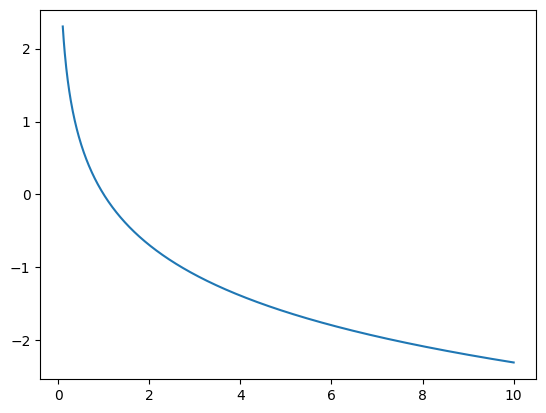

In [13]:
import math
x = np.arange(0.1,10,0.011)
y = [-math.log(i) for i in x]
plt.plot(x,y)

In [ ]:
print(-math.log(1 - 0.00001))
print(-math.log(1 - 0.99999))

print(math.log(0.99999))
print(math.log(0.00001))

1.0000050000287824e-05
11.51292546497478
-1.0000050000287824e-05
-11.512925464970229


#### Cross Entropy Loss $L$
- Goal: Minimizing Cross Entropy Loss
- $ L = \frac {1}{N} \sum_i D(g(Ax_i + b), L_i)$

## 2. Building a Logistic Regression Model with PyTorch

### Steps
- Step 1: Load Dataset
- Step 2: Make Dataset Iterable
- Step 3: Create Model Class
- Step 4: Instantiate Model Class
- Step 5: Instantiate Loss Class
- Step 6: Instantiate Optimizer Class
- Step 7: Train Model

### Step 1a: Loading MNIST Train Dataset
**Images from 1 to 9**

In [15]:
import torch
import torch.nn as nn
from torchvision import datasets
from torchvision.transforms import ToTensor

In [16]:
train = datasets.MNIST(
    root = 'data',
    train = True,
    download = True,
    transform = ToTensor()
)
test = datasets.MNIST(
    root = 'data',
    train = False,
    download = True,
    transform = ToTensor()
)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:01<00:00, 6076432.58it/s] 


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 158530.09it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:05<00:00, 309167.94it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 7271194.19it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [17]:
print(len(train))
print(len(test))

60000
10000


In [ ]:
type(train[0])

tuple

In [ ]:
# Input Matrix
train[0][0].size()

torch.Size([1, 28, 28])

In [22]:
# Label
train[0][1]

5

#### Displaying MNIST

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [24]:
train[0][0].numpy().shape

(1, 28, 28)

In [25]:
show_img = train[0][0].numpy().reshape(28, 28)

Text(0.5, 1.0, '5')

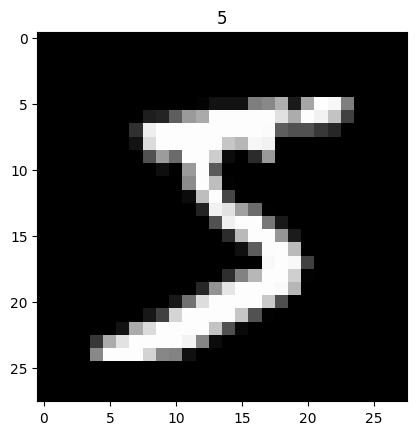

In [27]:
plt.imshow(show_img, cmap='gray')
plt.title(train[0][1])

In [29]:
show_img = train[1][0].numpy().reshape(28, 28)

Text(0.5, 1.0, '0')

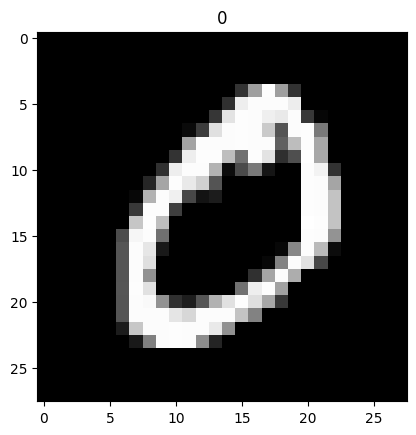

In [30]:
plt.imshow(show_img, cmap='gray')
plt.title(train[1][1])

### Step 1b: Loading MNIST Test Dataset
- Show our algorithm works beyond the data we have trained on.
- Out-of-sample

### Step 2: Make Dataset Iterable

- Aim: make the dataset iterable
- **totaldata**: 60000
- **minibatch**: 100
    - Number of examples in 1 iteration
- **iterations**: 3000
    - 1 iteration: one mini-batch forward & backward pass
- **epochs**
    - 1 epoch: running through the whole dataset once
    -
$epochs = iterations \div \frac{totaldata}{minibatch} = 3000 \div \frac{60000}{100} = 5 $

In [31]:
# how many times would you like our model to see the entire dataset?
# say we put 3000, for this 3000 times it will perform forward and backward pass for the entire dataset
n_iter = 3000

# how many instances would you like to have in a batch? say 100
batch_size = 100
# we have 60000 instances and a batch of 100 instances, so we need 60000/100 = 600 batches
# so for 3000 iterations with 600 batches we need 3000/600 = 5 epochs
num_epochs = n_iter / (len(train) / batch_size)
num_epochs = int(num_epochs)
num_epochs

5

#### Create Iterable Object: Training Dataset

In [33]:
from torch.utils.data import DataLoader
train_dataloader = DataLoader(train, batch_size = batch_size, shuffle = True)

#### Create Iterable Object: Testing Dataset

In [36]:
# Iterable object
test_dataloader = DataLoader(test, batch_size = batch_size, shuffle = True)

#### Main Aim: Iterate Through Dataset

In [37]:
img_1 = np.ones((28, 28))
img_2 = np.ones((28, 28))
lst = [img_1, img_2]

In [38]:
# Need to iterate
# Think of numbers as the images
for i in lst:
    print(i.shape)

(28, 28)
(28, 28)


### Step 3: Building Model

In [39]:
# just as we did in Linear Regression model
class LogisticRegression(nn.Module):
  def __init__(self,ip,op):
    super(LogisticRegression, self).__init__()
    self.linear = nn.Linear(ip, op)
  def forward(self,x):
    return self.linear(x)

### Step 4: Instantiate Model Class


- Input Dim
  - Size of Image
  - $28 \times 28 = 784$

- Ouput Dim = 10 -> 0 to 9 digits

In [40]:
input_dim = 28*28
output_dimension = 10
model = LogisticRegression(input_dim, output_dimension)

### Step 5: Instantiate Loss Class
- **Logistic Regression**: Cross Entropy Loss
    - _Linear Regression: MSE_
   

In [41]:
criterion = nn.CrossEntropyLoss()

#### What happens in `nn.CrossEntropyLoss()`?
- Computes softmax (logistic/softmax function)
- Computes cross entropy


### Step 6: Instantiate Optimizer Class
- Simplified equation
    - $\theta = \theta - \eta \cdot \nabla_\theta $

    - $\theta$: parameters (our variables)

    - $\eta$: learning rate (how fast we want to learn)

  - $\nabla_\theta$: parameters' gradients

- Even simplier equation
    - `parameters = parameters - learning_rate * parameters_gradients`
    - **At every iteration, we update our model's parameters**

In [42]:
lr = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr = lr)

### Parameters In-Depth

In [50]:
print(len(list(model.parameters()))) # Weights and biases
print(list(model.parameters())[0].size()) # weights
print(list(model.parameters())[1].size()) # biases

2
torch.Size([10, 784])
torch.Size([10])


In [ ]:
print(model.parameters())

print(len(list(model.parameters())))

# FC 1 Parameters
print(list(model.parameters())[0].size())

# FC 1 Bias Parameters
print(list(model.parameters())[1].size())

<generator object Module.parameters at 0x7ff7c884f830>
2
torch.Size([10, 784])
torch.Size([10])


### Step 7: Train Model
- Process
    1. Convert inputs/labels to variables
    2. Clear gradient buffets
    3. Get output given inputs
    4. Get loss
    5. Get gradients w.r.t. parameters
    6. Update parameters using gradients
        - `parameters = parameters - learning_rate * parameters_gradients`
    7. REPEAT

In [53]:
next(iter(train_dataloader))[0].shape

torch.Size([100, 1, 28, 28])

In [54]:
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_dataloader):
        # Load images as Variable
        images = images.view(-1, 28*28).requires_grad_()
        labels = labels

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images)

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_dataloader:
                # Load images to a Torch Variable
                images = images.view(-1, 28*28).requires_grad_()

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)

                # Total number of labels
                total += labels.size(0)

                # Total correct predictions
                correct += (predicted == labels).sum()

            accuracy = 100 * correct / total

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 0.8194100260734558. Accuracy: 84.9000015258789
Iteration: 1000. Loss: 0.6353297233581543. Accuracy: 86.87999725341797
Iteration: 1500. Loss: 0.6256530284881592. Accuracy: 87.91000366210938
Iteration: 2000. Loss: 0.4071776270866394. Accuracy: 88.5199966430664
Iteration: 2500. Loss: 0.5027294754981995. Accuracy: 88.91000366210938
Iteration: 3000. Loss: 0.402378112077713. Accuracy: 89.36000061035156


#### Break Down Accuracy Calculation

In [55]:
iter_test = 0
for images, labels in test_dataloader:
    iter_test += 1
    images = images.view(-1, 28*28).requires_grad_()
    outputs = model(images)
    if iter_test == 1:
        print('OUTPUTS')
        print(outputs)
    _, predicted = torch.max(outputs.data, 1);

OUTPUTS
tensor([[-2.5850e+00,  2.9412e+00, -2.4474e-01,  8.5796e-01, -1.1896e+00,
          4.3847e-01, -3.8793e-01, -6.1999e-01,  4.9821e-01,  2.0813e-01],
        [ 5.1096e-02, -4.1628e+00, -2.2310e+00,  5.7640e+00, -6.5216e-02,
          3.8821e+00, -4.4829e+00, -2.3336e+00,  2.8690e+00,  1.8460e-01],
        [ 8.7834e-01, -1.0239e+00,  4.3432e+00,  2.1110e+00, -3.7719e+00,
          4.6055e-01, -1.8172e+00, -4.1583e+00,  5.7057e+00, -2.2262e+00],
        [-3.9003e+00,  2.6624e-01, -1.8342e+00, -1.4656e+00,  1.4625e+00,
          8.5503e-02,  1.0249e+00,  4.4383e-01,  1.1763e+00,  3.1295e+00],
        [ 6.4373e+00, -4.4259e+00,  1.6422e+00, -2.3025e+00, -3.9599e+00,
          1.8916e+00,  2.4420e+00, -1.3251e+00,  7.6176e-01, -1.1852e+00],
        [ 4.7082e+00, -5.8232e+00,  7.9024e-01, -2.8046e+00,  6.0062e-01,
          1.4408e-01,  5.6321e+00, -1.0072e+00, -1.3784e+00, -1.2768e+00],
        [ 1.3581e-01, -5.8568e+00,  1.5936e+00, -1.4233e+00,  2.8970e+00,
         -2.3695e+00,  4

In [56]:
iter_test = 0
for images, labels in test_dataloader:
    iter_test += 1
    images = images.view(-1, 28*28).requires_grad_()
    outputs = model(images)
    if iter_test == 1:
        print('OUTPUTS')
        print(outputs.size())
    _, predicted = torch.max(outputs.data, 1)

OUTPUTS
torch.Size([100, 10])


for a test batch of 100 instances we have 10 probabilities for each digit

In [58]:
iter_test = 0
for images, labels in test_dataloader:
    iter_test += 1
    images = images.view(-1, 28*28).requires_grad_()
    outputs = model(images)
    if iter_test == 1:
        print('OUTPUTS')
        print(outputs[0, :])
    _, predicted = torch.max(outputs.data, 1)

OUTPUTS
tensor([-0.4418, -3.2006,  4.0965,  8.1393, -5.6233,  1.7793, -3.2817, -0.0784,
         1.0846, -2.1985], grad_fn=<SliceBackward0>)


In [59]:
iter_test = 0
for images, labels in test_dataloader:
    iter_test += 1
    images = images.view(-1, 28*28).requires_grad_()
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    if iter_test == 1:
        print('PREDICTION')
        print(predicted.size())

PREDICTION
torch.Size([100])


In [60]:
iter_test = 0
for images, labels in test_dataloader:
    iter_test += 1
    images = images.view(-1, 28*28).requires_grad_()
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    if iter_test == 1:
        print('PREDICTION')
        print(predicted[0])

PREDICTION
tensor(1)


In [61]:
iter_test = 0
for images, labels in test_dataloader:
    iter_test += 1
    images = images.view(-1, 28*28).requires_grad_()
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    if iter_test == 1:
        print('PREDICTION')
        print(predicted[0])

        print('LABEL SIZE')
        print(labels.size())

        print('LABEL FOR IMAGE 0')
        print(labels[0])

PREDICTION
tensor(1)
LABEL SIZE
torch.Size([100])
LABEL FOR IMAGE 0
tensor(1)


In [62]:
iter_test = 0
for images, labels in test_dataloader:
    iter_test += 1
    images = images.view(-1, 28*28).requires_grad_()
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)

    if iter_test == 1:
        print('PREDICTION')
        print(predicted[1])

        print('LABEL SIZE')
        print(labels.size())

        print('LABEL FOR IMAGE 1')
        print(labels[1])

PREDICTION
tensor(1)
LABEL SIZE
torch.Size([100])
LABEL FOR IMAGE 1
tensor(1)


In [63]:
correct = 0
total = 0
iter_test = 0
for images, labels in test_dataloader:
    iter_test += 1
    images = images.view(-1, 28*28).requires_grad_()
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)

    # Total number of labels
    total += labels.size(0)

    # Total correct predictions
    correct += (predicted == labels).sum()

accuracy = 100 * (correct.item() / total)

print(accuracy)

89.36


#### Saving Model

In [ ]:
save_model = False
if save_model is True:
    # Saves only parameters
    torch.save(model.state_dict(), 'awesome_model.pkl')

## 3. Building a Logistic Regression Model with PyTorch (GPU)



**CPU Version**

In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

'''
STEP 1: LOADING DATASET
'''

train_dataset = dsets.MNIST(root='./data',
                            train=True,
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data',
                           train=False,
                           transform=transforms.ToTensor())

'''
STEP 2: MAKING DATASET ITERABLE
'''

batch_size = 100
n_iters = 3000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

'''
STEP 3: CREATE MODEL CLASS
'''
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        out = self.linear(x)
        return out

'''
STEP 4: INSTANTIATE MODEL CLASS
'''
input_dim = 28*28
output_dim = 10

model = LogisticRegressionModel(input_dim, output_dim)

'''
STEP 5: INSTANTIATE LOSS CLASS
'''
criterion = nn.CrossEntropyLoss()


'''
STEP 6: INSTANTIATE OPTIMIZER CLASS
'''
learning_rate = 0.001

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

'''
STEP 7: TRAIN THE MODEL
'''
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Load images as Variable
        images = images.view(-1, 28*28).requires_grad_()
        labels = labels

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        # 100 x 10
        outputs = model(images)

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                # Load images to a Torch Variable
                images = images.view(-1, 28*28).requires_grad_()

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                # 100 x 1
                _, predicted = torch.max(outputs.data, 1)

                # Total number of labels
                total += labels.size(0)

                # Total correct predictions
                correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 1.876196026802063. Accuracy: 64.44
Iteration: 1000. Loss: 1.5153584480285645. Accuracy: 75.68
Iteration: 1500. Loss: 1.3521136045455933. Accuracy: 78.98
Iteration: 2000. Loss: 1.2136967182159424. Accuracy: 80.95
Iteration: 2500. Loss: 1.0934826135635376. Accuracy: 81.97
Iteration: 3000. Loss: 1.024120569229126. Accuracy: 82.49


GPU: 2 things must be on GPU
- `model`
- `variables`

In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

'''
STEP 1: LOADING DATASET
'''

train_dataset = dsets.MNIST(root='./data',
                            train=True,
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data',
                           train=False,
                           transform=transforms.ToTensor())

'''
STEP 2: MAKING DATASET ITERABLE
'''

batch_size = 100
n_iters = 3000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

'''
STEP 3: CREATE MODEL CLASS
'''
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        out = self.linear(x)
        return out

'''
STEP 4: INSTANTIATE MODEL CLASS
'''
input_dim = 28*28
output_dim = 10

model = LogisticRegressionModel(input_dim, output_dim)

#######################
#  USE GPU FOR MODEL  #
#######################

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

'''
STEP 5: INSTANTIATE LOSS CLASS
'''
criterion = nn.CrossEntropyLoss()


'''
STEP 6: INSTANTIATE OPTIMIZER CLASS
'''
learning_rate = 0.001

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

'''
STEP 7: TRAIN THE MODEL
'''
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        #######################
        #  USE GPU FOR MODEL  #
        #######################
        images = images.view(-1, 28*28).requires_grad_().to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images)

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                #######################
                #  USE GPU FOR MODEL  #
                #######################
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)

                # Total number of labels
                total += labels.size(0)

                #######################
                #  USE GPU FOR MODEL  #
                #######################
                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 1.8571407794952393. Accuracy: 68.99
Iteration: 1000. Loss: 1.5415704250335693. Accuracy: 75.86
Iteration: 1500. Loss: 1.2755383253097534. Accuracy: 78.92
Iteration: 2000. Loss: 1.2468739748001099. Accuracy: 80.72
Iteration: 2500. Loss: 1.0708973407745361. Accuracy: 81.73
Iteration: 3000. Loss: 1.0359245538711548. Accuracy: 82.74


# Summary

- **Logistic regression** basics
- **Problems** of **linear regression**
- **In-depth** Logistic Regression
    1. Get logits
    2. Get softmax
    3. Get cross-entropy loss
- **Aim**: reduce cross-entropy loss
- Built a **logistic regression model** in **CPU and GPU**
    - Step 1: Load Dataset
    - Step 2: Make Dataset Iterable
    - Step 3: Create Model Class
    - Step 4: Instantiate Model Class
    - Step 5: Instantiate Loss Class
    - Step 6: Instantiate Optimizer Class
    - Step 7: Train Model
- Important things to be on **GPU**
    - `model`
    - `tensors with gradients`